In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

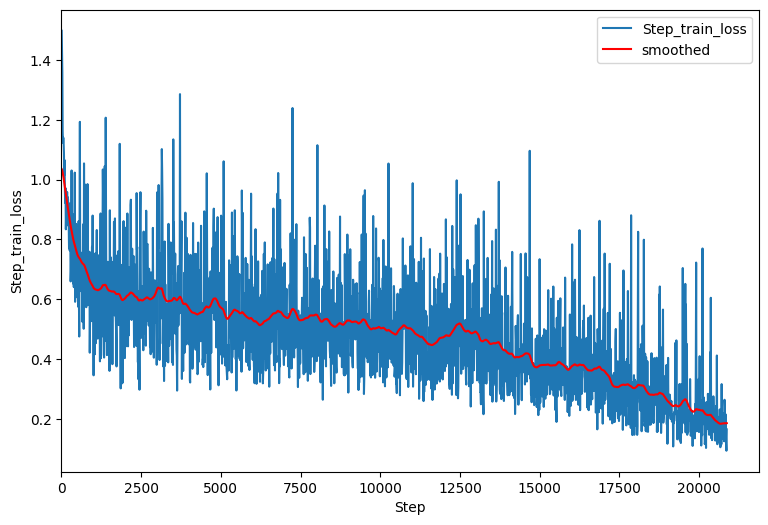

In [48]:
class MetricsPlotter:
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)

    def plot_metric(self, metric_name, x_axis='step', max_epoch=50, smooth=True):
        if x_axis not in self.data.columns:
            raise ValueError(f"Invalid x_axis '{x_axis}'. Choose either 'epoch' or 'step'.")

        if metric_name not in self.data.columns:
            raise ValueError(f"Metric '{metric_name}' not found in the CSV file.")

        self.x_axis = x_axis

        filtered_data = self.data[self.data['epoch'] <= max_epoch]

        filtered_data = filtered_data.dropna(subset=[metric_name])
        X, Y = filtered_data[self.x_axis], filtered_data[metric_name]
        plt.figure(figsize=(9, 6))
        plt.plot(X, Y, label=metric_name.capitalize())
        if smooth:
            rbf = Rbf(X, Y, function = 'multiquadric', smooth = 500)
            y_rbf = rbf(X)
            plt.plot(X,y_rbf,color='r', label="smoothed")
        plt.xlabel(self.x_axis.capitalize())
        plt.ylabel(metric_name.capitalize())
        #plt.title(f"{metric_name.capitalize()} over {self.x_axis.capitalize()}")
        plt.legend(loc=1)
        if self.x_axis == "epoch":
            plt.xlim(0, max_epoch)
        else:
            plt.xlim(0, 428 + 429 * max_epoch)
        plt.show()


# Example usage
file_path = r'C:\Users\CHOI\Documents\Study\Unet\logs\unet\CSVLogger\lr_1e-4\metrics.csv'
plotter = MetricsPlotter(file_path)
plotter.plot_metric('step_train_loss', smooth=True) 


In [49]:
e3 = pd.read_csv(r'C:\Users\CHOI\Documents\Study\Unet\logs\unet\CSVLogger\lr_1e-3\metrics.csv')
e3_s = pd.read_csv(r'C:\Users\CHOI\Documents\Study\Unet\logs\unet\CSVLogger\lr_1e-03_crossentropy_lrscheduled\metrics.csv')
e4 = pd.read_csv(r'C:\Users\CHOI\Documents\Study\Unet\logs\unet\CSVLogger\lr_1e-4\metrics.csv')
e4_s = pd.read_csv(r'C:\Users\CHOI\Documents\Study\Unet\logs\unet\CSVLogger\lr_1e-04_crossentropy_lrscheduled\metrics.csv')

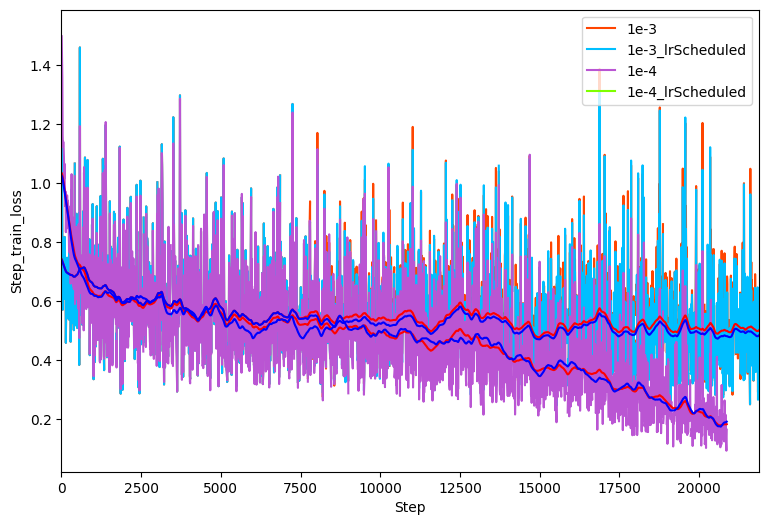

In [90]:
def plot_smooth(X, Y, c='r'):
    X, Y = X.fillna(0), Y.fillna(0)
    rbf = Rbf(X, Y, function = 'multiquadric', smooth = 500)
    y_rbf = rbf(X)
    plt.plot(X,y_rbf,color=c)

def plot_smooth2(X, Y):
    import numpy as np
    X, Y = X.fillna(0), Y.fillna(0)
    Y += np.random.uniform(-0.2, 0.2, size=len(Y))
    rbf = Rbf(X, Y, function = 'multiquadric', smooth = 500)
    y_rbf = rbf(X)
    plt.plot(X,y_rbf,color='b')

plt.figure(figsize=(9, 6))
plt.plot(e3["step"], e3["step_train_loss"], label="1e-3", c="orangered")
plt.plot(e3_s["step"], e3_s["step_train_loss"], label="1e-3_lrScheduled", c="deepskyblue")
plt.plot(e4["step"], e4["step_train_loss"], label="1e-4", c="mediumorchid")
plt.plot(e4_s["step"], e4_s["step_train_loss"], label="1e-4_lrScheduled", c='chartreuse')

plot_smooth(e3["step"], e3["step_train_loss"])
plot_smooth(e4["step"], e4["step_train_loss"])
plot_smooth(e3_s["step"], e3_s["step_train_loss"], c='b')
plot_smooth2(e4["step"], e4["step_train_loss"])

plt.xlabel('Step')
plt.ylabel("Step_train_loss")
plt.legend(loc=1)
plt.xlim(0, 428 + 429 * 50)
plt.show()

In [87]:
e4_s["step_train_loss"]

0            NaN
1       1.498249
2            NaN
3       1.433996
4            NaN
          ...   
3725    0.309308
3726         NaN
3727    0.180049
3728         NaN
3729    0.281962
Name: step_train_loss, Length: 3730, dtype: float64